# Perceptron 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## binary classifier
## return 1,-1

def classifer(w,b,x):
    if (np.dot(w,x)+b)>0:
        return 1
    if (np.dot(w,x)+b)<=0:
        return -1
    return 0

In [3]:
## create random permutations to run our for loop
I = np.random.permutation(100)
I

array([40, 53, 34, 42, 84, 37, 78, 69, 13, 73, 99, 91, 25, 43, 20, 76, 92,
        6, 87, 49, 55, 47, 38, 46, 51, 29, 56, 52,  0, 71, 26, 88, 57,  1,
       66, 17, 81, 98, 36, 33, 82, 50,  5, 59, 77, 45, 83, 15, 21, 94, 63,
       70, 16, 23,  2,  3, 27, 41, 32, 95, 19, 22, 68, 80, 11, 96, 44, 89,
       58, 35,  8, 48, 79,  4, 86, 60, 93, 61, 28, 18, 67,  9, 85, 75, 62,
       12, 65,  7, 74, 14, 90, 72, 10, 54, 64, 39, 30, 97, 31, 24])

In [4]:
def train_perceptron(x,y,n_iters=100):
    n,d = x.shape
    b = 0
    w = np.zeros((d,))
    done = False
    converged = True
    iters =0
    #np.random.seed(12)  create seed to get same output every time
    
    while not(done):
        done = True
        I = np.random.permutation(n)
        for i in range(n):
            j= I[i]
            if (classifer(w,b,x[j,:])!=y[j]):
                w = w+y[j]*x[j,:]
                b = b+y[j]
                done = False
        iters = iters+1
        if iters > n_iters:
            done= True
            converged= False
    if converged:
        print ("Perceptron algorithm: iterations until convergence: ", iters)
    else:
        print ("Perceptron algorithm: did not converge within the specified number of iterations")
    return w, b, converged

The directory containing this notebook should also contain the two-dimensional data files, `data_1.txt` and `data_2.txt`. These files contain one data point per line, along with a label, like:
* `3 8 1` (meaning that point `x=(3,8)` has label `y=1`)

The next procedure, **run_perceptron**, loads one of these data sets, learns a linear classifier using the Perceptron algorithm, and then displays the data as well as the boundary.

In [5]:
data = np.loadtxt('data_1.txt')
data[:5]
x = data[:,0:2]
x.shape

(85, 2)

In [6]:
def run_perceptron(datafile):
    data = np.loadtxt(datafile)
    n,d = data.shape
    
    ## create training set x and labels Y
    x = data[:,0:2]
    y = data[:, 2]
    ## rub peceptron atmost 100 interations
    w,b, converged = train_perceptron(x,y, n_iters=100)
    
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    
    ## plot data points
    plt.plot(x[(y==1),0], x[(y==1),1], 'ro')
    plt.plot(x[(y==-1),0], x[(y==-1),1], 'k^')
    
    if converged:
        grid_spacing = 0.05
        xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
        grid = np.c_[xx1.ravel(), xx2.ravel()]
        Z = np.array([classifer(w,b,pt) for pt in grid])
        Z = Z.reshape(xx1.shape)
        plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.PRGn, vmin=-3, vmax=3)
    plt.show()

Perceptron algorithm: iterations until convergence:  7


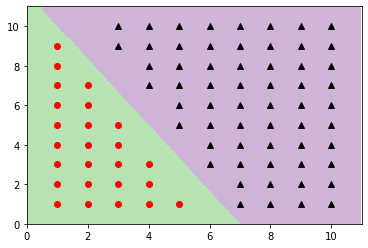

In [7]:
run_perceptron('data_1.txt')

Perceptron algorithm: did not converge within the specified number of iterations


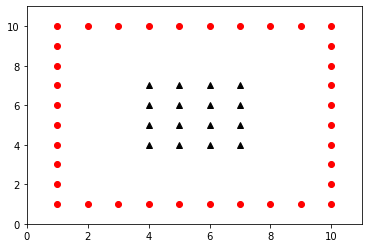

In [8]:
run_perceptron('data_2.txt')